# Ejercicio 3 -   Regresión Lineal con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Lineal utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería y comprender la relación de sus clases y métodos con los que definimos en los ejercicios 1 y 2.



In [1]:
%matplotlib notebook

In [2]:
import rnutil
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import SGD

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [5]:
tf.__version__

'2.10.0-dev20220402'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-04-02 17:54:05.564156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 17:54:05.581249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 17:54:05.581358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# Creando modelos de regresión y prediciendo valores

El siguiente codigo crea modelos de Keras con distintos valores de `w` y `b` y verifica su salida.

Para crear un modelo de Keras utilizamos la clase `Sequential`, que permite utilizar modelos de varias capas. No obstante, en este caso vamos a crear modelos con una sola capa, la capa de clase `Dense` (también conocida como `fully connected` o `lineal`), que permite hacer regresión lineal con varias variables de entrada y de salida. 

Al crear la capa, especificamos la dimensionalidad de salida (1 en este caso) y la de entrada (2 en este caso). De esta forma el modelo puede crear e inicializar los parámetros `W` y `b`.

Como estamos probando un modelo puramente lineal, especificamos `activation=None` para que Keras no agregue ninguna función no-lineal a la salida.

Por último, utilizamos los parámetros por nombre `kernel_initializer` y `bias_initializer` de la clase `Dense` para especificar como inicializar los parámetros `w` (kernel) y `b` (bias) respectivamente. En este caso, utilizamos `keras.initializers.Constant` para inicializarlo con algunos valores constantes.

Ejecuta el siguiente bloque para verificar que en las 4 pruebas la función `predict` de los modelos de Keras hace lo mismo que la función `forward` vista anteriormente. En cada una de las pruebas, estamos inicializando el modelo con distintos valores de `w` y `b`.

In [6]:
x = np.array([
    [1.0,2.0],
    [2.0,3.0],
    [3.0,4.0]
])

dimensionalidad_salida  = 1
dimensionalidad_entrada = (2,)

### PRUEBA 1

In [7]:
model1 = Sequential([
    Dense(
        dimensionalidad_salida,
        input_shape        = dimensionalidad_entrada,
        activation         = None,
        kernel_initializer = Constant(value=0), # inicializo w=(0,0),
        bias_initializer   = Constant(value=0)  # inicializo b=0
    )
])

2022-04-02 17:54:05.594836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-02 17:54:05.595527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 17:54:05.595635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 17:54:05.595711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [8]:
y_prediccion = model1.predict(x)

y = np.zeros((3,1))
rnutil.verificar_igualdad(y, y_prediccion)

1/1 [==============================] - 0s 426ms/step
Los vectores x e y son iguales:
x:  [[0.]
 [0.]
 [0.]]
y:  [[0.]
 [0.]
 [0.]]


### PRUEBA 2

In [9]:
# Defino un modelo con w=(1,1) y b=0
model2 = Sequential([
    Dense(
        dimensionalidad_salida,
        input_shape        = dimensionalidad_entrada,
        activation         = None,
        kernel_initializer = Constant(value=1),
        bias_initializer   = Constant(value=0)
    )
])

In [10]:
y_prediccion = model2.predict(x)
y            = np.array([[3.0, 5.0, 7.0]]).T

rnutil.verificar_igualdad(y,y_prediccion)

1/1 [==============================] - 0s 15ms/step
Los vectores x e y son iguales:
x:  [[3.]
 [5.]
 [7.]]
y:  [[3.]
 [5.]
 [7.]]


### PRUEBA 3

In [11]:
model3 = Sequential([
    Dense(
        dimensionalidad_salida,
        input_shape        = dimensionalidad_entrada,
        activation         = None,
        kernel_initializer = Constant(value=0), # Defino un modelo con w=(0,0) y b=1
        bias_initializer   = Constant(value=1)
    )
])

In [12]:
y            = np.ones((3,1))
y_prediccion = model3.predict(x)

rnutil.verificar_igualdad(y,y_prediccion)

1/1 [==============================] - 0s 16ms/step
Los vectores x e y son iguales:
x:  [[1.]
 [1.]
 [1.]]
y:  [[1.]
 [1.]
 [1.]]


### PRUEBA 4

In [13]:
model4 = Sequential([
    Dense(
        dimensionalidad_salida,
        input_shape        = dimensionalidad_entrada,
        activation         = None,
        kernel_initializer = Constant(value=1), # Defino un modelo con w=(1,1) y b=1
        bias_initializer   = Constant(value=1)
    )
])

In [14]:
y_prediccion = model4.predict(x)
y            = np.array([[4.0,6.0,8.0]]).T
rnutil.verificar_igualdad(y,y_prediccion)

1/1 [==============================] - 0s 24ms/step
Los vectores x e y son iguales:
x:  [[4.]
 [6.]
 [8.]]
y:  [[4.]
 [6.]
 [8.]]


# Entrenar un modelo de Regresión Lineal con Keras para el dataset de estudio 2D

El siguiente código carga un dataset de prueba con 2 dimensiones de entrada y una de salida.

Luego crea un modelo de regresión lineal con Keras, y visualiza sus pesos iniciales. 

Es importante notar tres cosas:

1. La métrica utilizada es `'mse'`, es decir el error cuadrático medio o promedio. Esta es la misma métrica vista en la teoría de Regresión Lineal.

2. El optimizador es una clase que define el algoritmo para minimizar el error cuadrático. En general, son todas variantes de descenso de gradiente. En este caso, estamos utilizando descenso de gradiente estocástico (`keras.optimizers.SGD`), que es igual al descenso de gradiente pero realiza cada actualización de los parámetros con un subconjunto de los ejemplos del dataset. 

3. El método para entrenar el modelo es `fit`. En este caso, el parámetro `lr` lo recibe el optimizador, pero `fit` recibe la cantidad de iteraciones (`epochs`) y el tamaño del batch para el SGD (`batch_size`).


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo?

### Carga del dataset

In [15]:
data = rnutil.load_dataset_numpy("study_regression_2d_small.csv")

x, y = data[:,0:2],data[:,2:3]
n, d_in = x.shape
n, d_out = y.shape

Loading file from package rnutil (/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/data)...
Done


### Creación del modelo inicial

In [16]:
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
# Creo un modelo lineal
modelo = Sequential([Dense(d_out, input_shape=(d_in,), activation=None)])

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


### Visualización del modelo inicial

In [17]:
w, b = modelo.get_weights()

rnutil.plot_regresion_lineal(
    w, 
    b, 
    x, 
    y, 
    title="Modelo inicial"
)

plt.show()

TypeError: plot_regresion_lineal() missing 4 required positional arguments: 'y', 'x1_label', 'x2_label', and 'y_label'

### Entrenamiento del modelo

In [25]:
modelo.compile(
    # Algoritmo de optimización: Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
    optimizer = SGD(learning_rate=0.001),

    # Error cuadrático medio es la métrica de error a optimizar
    loss = 'mse',
    
    # Metricas para ir calculando en cada iteracion o batch (ninguna ahora).
    metrics=['mae'],
)

history  = modelo.fit(
    x,
    y,
    epochs     = 15,
    batch_size = 32
)

Epoch 1/15
1/1 [==============================] - 0s 98ms/step - loss: 0.7734 - mae: 0.7700
Epoch 2/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7721 - mae: 0.7694
Epoch 3/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7708 - mae: 0.7688
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7696 - mae: 0.7681
Epoch 5/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7683 - mae: 0.7675
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7671 - mae: 0.7669
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 0.7659 - mae: 0.7663
Epoch 8/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7648 - mae: 0.7657
Epoch 9/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7636 - mae: 0.7651
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7625 - mae: 0.7645
Epoch 11/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7614 - mae: 0.7

In [24]:
modelo.compile(
    # Algoritmo de optimización: Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
    optimizer = SGD(learning_rate=0.001),
    
    # error cuadrático medio es la métrica de error a optimizar
    loss = 'mse', 
    
    # metricas para ir calculando en cada iteracion o batch (ninguna ahora)
    metrics = ['mae']
)

history  = modelo.fit(
    x,
    y,
    epochs     = 15,
    batch_size = 32
)

Epoch 1/15
1/1 [==============================] - 0s 100ms/step - loss: 0.7969 - mae: 0.7805
Epoch 2/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7951 - mae: 0.7798
Epoch 3/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7933 - mae: 0.7790
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7916 - mae: 0.7783
Epoch 5/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7899 - mae: 0.7775
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7882 - mae: 0.7768
Epoch 7/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7866 - mae: 0.7761
Epoch 8/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7850 - mae: 0.7754
Epoch 9/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7835 - mae: 0.7747
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.7819 - mae: 0.7740
Epoch 11/15
1/1 [==============================] - 0s 1ms/step - loss: 0.7804 - mae: 0.

### Visualiza el modelo y los datos

<IPython.core.display.Javascript object>


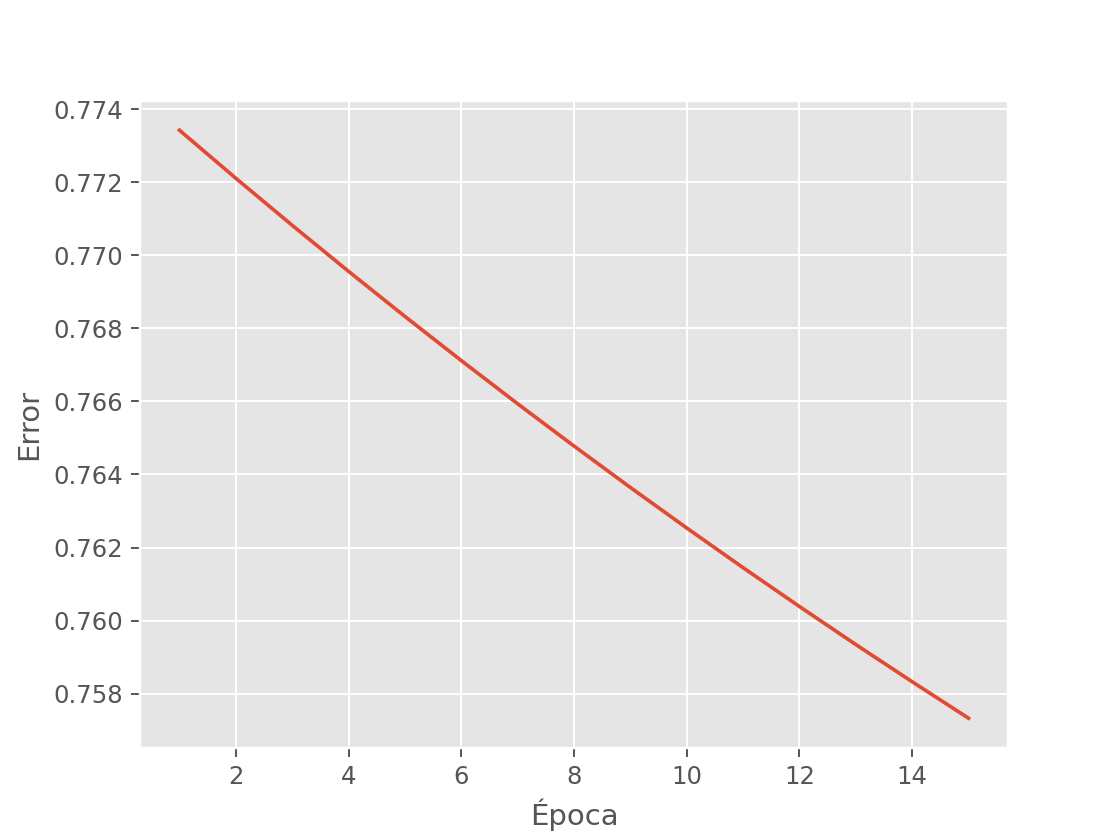

TypeError: plot_regresion_lineal() missing 4 required positional arguments: 'y', 'x1_label', 'x2_label', and 'y_label'

In [27]:
# dibujar curva de error
rnutil.plot_loss(history.history["loss"])

w, b = modelo.get_weights()

rnutil.plot_regresion_lineal(
    w,
    b,
    x,
    y,
    title="Modelo Final"
)